# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    'Функция для создания категорий по доходу.'
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    'Функция для созания категорий по цели кредита.'
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

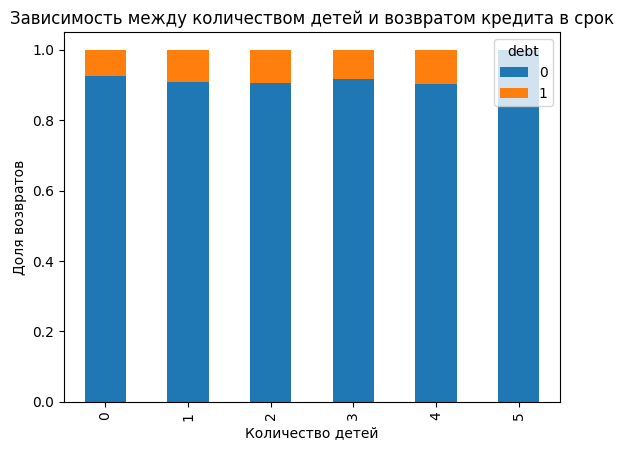

In [23]:
import matplotlib.pyplot as plt

children_credit_return = data.groupby('children')['debt'].value_counts(normalize=True).unstack()
children_credit_return.plot(kind='bar', stacked=True)
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.xlabel('Количество детей')
plt.ylabel('Доля возвратов')
plt.show()

In [24]:
# Построение сводных таблиц.
def create_pivot_table(data, index_column):
    '''Функция для создания сводной таблицы по категориям.'''
    pivot_table = data.pivot_table(
        index=index_column,
        values='debt',
        aggfunc='count'
    ).rename_axis('Категория')
    
    # Добавление доли клиентов в категории
    total_clients = data['debt'].count()
    pivot_table['Клиентов (%)'] = (pivot_table['debt'] / total_clients) * 100
    pivot_table['Клиентов (%)'] = pivot_table['Клиентов (%)'].round(2)

    # Добавление доли задолженности в категории
    debt_counts = data.groupby(index_column)['debt'].mean() 
    pivot_table['Должников (%)'] = debt_counts * 100  
    pivot_table['Должников (%)'] = pivot_table['Должников (%)'].round(2)

    # Удаление столбца 'debt' (если он существует)
    if 'debt' in pivot_table.columns:
        pivot_table = pivot_table.drop('debt', axis=1)

    return pivot_table

In [25]:
# Создание сводной таблицы для количества детей
children_pivot = create_pivot_table(data, 'children')
display(children_pivot)

,Клиентов (%),Должников (%)
Категория,,
0,66.06,7.54
1,22.54,9.23
2,9.62,9.45
3,1.55,8.18
4,0.19,9.76
5,0.04,0.00


**Вывод:** Код выполняет группировку данных по количеству детей (children) и подсчитывает долю возвратов кредита в срок (debt).
Параметр normalize=True указывает, что мы хотим получить долю каждого значения относительно общего количества записей в группе.
Явной зависимости между количеством детей и возвратом кредита в срок нет. 9 кредитов (меньше 0.04% всех кредитов) — это слишком малое количество для того, чтобы делать вывод, что семьи с 5-ю детьми более ответственые. Для того чтобы говорить о предполагаемой зависимости, необходимо больше данных и наблюдений.

Проверим, что выборки имеют достаточный размер для анализа, то есть больше 2% от всей. Если выборка слишком мала или не охватывает все категории, то сделанные на её основе выводы могут быть ошибочными. Проверка размерности позволяет избежать статистических ошибок и повысить точность анализа.

In [26]:
# Общее количество записей
total_count = len(data)

# Порог для достаточного размера выборки (2%)
threshold = total_count * 0.02

# Подсчет количества записей в каждой категории
category_counts = data['children'].value_counts()

# Фильтрация категорий, которые не соответствуют порогу
not_valid_categories = category_counts[category_counts <= threshold]

# Печать результатов
print("Общее количество записей:", total_count)
print("Порог для достаточного размера выборки:", threshold)
print()
print("Количество записей в категориях:\n", category_counts)
print()
print("Категории, меньше порога:\n", not_valid_categories)


Общее количество записей: 21331
Порог для достаточного размера выборки: 426.62

Количество записей в категориях:
 0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Категории, меньше порога:
 3    330
4     41
5      9
Name: children, dtype: int64


Группы с 3-мя, 4-мя, 5-ю детьми являются не репрезентативными, поскольку не удовлетворяют пороговому значению 426.62. Объединим эти группы и категорию с 2-мя детьми с группой с 1-м ребенком.

In [27]:
def categorize_children(row):
    'Функция, которая определяет наличие детей.'
    if row == 0:
        return 0
    elif row >= 1:
        return 1

# Применение функции для создания новой категории
data['children_category'] = data['children'].apply(categorize_children)

# Подсчет количества записей в новых категориях
new_category_counts = data['children_category'].value_counts()

# Печать результатов
print("Количество записей в новых категориях:\n", new_category_counts)

Количество записей в новых категориях:
 0    14091
1     7240
Name: children_category, dtype: int64


In [28]:
# Создание сводной таблицы для количества детей (0 - нет детей, 1 - есть дети)
children_pivot = create_pivot_table(data, 'children_category')
display(children_pivot)

,Клиентов (%),Должников (%)
Категория,,
0,66.06,7.54
1,33.94,9.24


**Вывод:** Большинство клиентов в выборке — это те, у кого нет детей (66.06%). Доля должников среди клиентов с детьми (9.24%) выше, чем среди клиентов без детей (7.54%). Это может указывать на то, что наличие детей связано с более высокой вероятностью задолженности.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

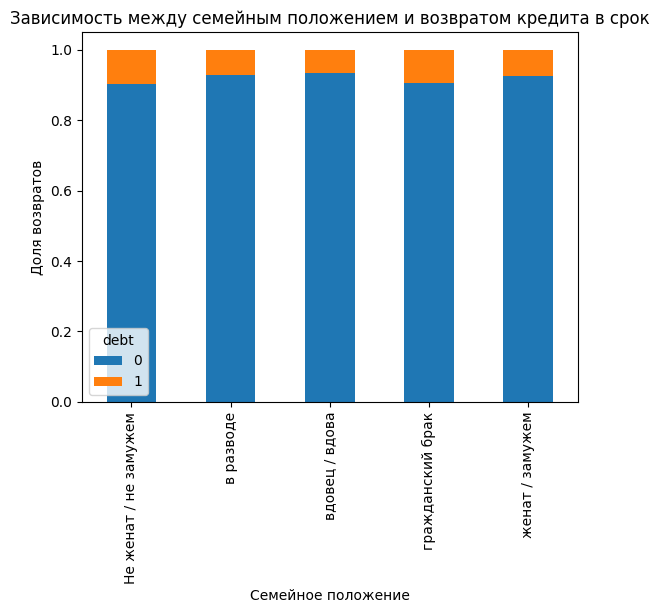

In [29]:
family_status_credit_return = data.groupby('family_status')['debt'].value_counts(normalize=True).unstack()
family_status_credit_return.plot(kind='bar', stacked=True)
plt.title('Зависимость между семейным положением и возвратом кредита в срок')
plt.xlabel('Семейное положение')
plt.ylabel('Доля возвратов')
plt.show()

In [30]:
# Создание сводной таблицы по семейному положению клиентов
family_status_pivot = create_pivot_table(data, 'family_status').reset_index()
display(family_status_pivot)

,Категория,Клиентов (%),Должников (%)
0,Не женат / не замужем,13.11,9.76
1,в разводе,5.57,7.06
2,вдовец / вдова,4.46,6.62
3,гражданский брак,19.38,9.31
4,женат / замужем,57.48,7.56


**Вывод:** Аналогично, проведен анализ зависимости между семейным положением (family_status) и возвратом кредита.

*Не женат / не замужем:* 9.76% должников, что может указывать на то, что эта группа имеет более высокую вероятность задолженности, возможно, из-за отсутствия финансовой поддержки со стороны партнера.

*Гражданский брак:* 9.31% должников, что также может указывать на финансовые обязательства, связанные с совместной жизнью.

*Женат / замужем:* 7.56% должников, что может свидетельствовать о более стабильном финансовом положении в этой категории.

*В разводе:* 7.06% должников, что может указывать на финансовые трудности, связанные с разводом.

*Вдовец / вдова:* 6.62% должников, что может быть связано с изменением финансового положения после потери партнера.

Вступившие и вступавшие в брак являются более отвественными, чем холостые.

In [31]:
# Получение медианного возраста по семейному положению
agg_func_describe = {'dob_years': ['median']}
median_age = data.groupby(['family_status']).agg(agg_func_describe).round(2).reset_index()
median_age = median_age.rename(columns={'family_status': 'Категория'})
median_age

,Категория,dob_years
,,median
0,Не женат / не замужем,36
1,в разводе,46
2,вдовец / вдова,58
3,гражданский брак,41
4,женат / замужем,43


In [32]:
import warnings
warnings.filterwarnings('ignore') # Отключение предупреждений

merged_results = pd.merge(median_age, family_status_pivot, on='Категория')
merged_results

,Категория,"(Категория, )","(dob_years, median)",Клиентов (%),Должников (%)
0,Не женат / не замужем,Не женат / не замужем,36,13.11,9.76
1,в разводе,в разводе,46,5.57,7.06
2,вдовец / вдова,вдовец / вдова,58,4.46,6.62
3,гражданский брак,гражданский брак,41,19.38,9.31
4,женат / замужем,женат / замужем,43,57.48,7.56


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

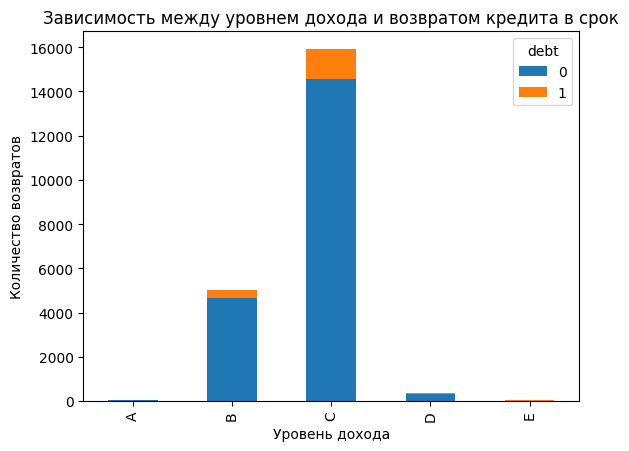

In [33]:
income_credit_return = data.groupby('total_income_category')['debt'].value_counts().unstack()
income_credit_return.plot(kind='bar', stacked=True)
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество возвратов')
plt.show()

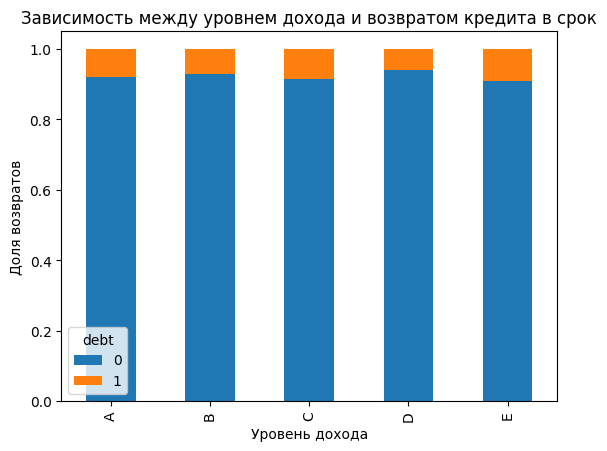

In [34]:
income_credit_return = data.groupby('total_income_category')['debt'].value_counts(normalize=True).unstack()
income_credit_return.plot(kind='bar', stacked=True)
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.xlabel('Уровень дохода')
plt.ylabel('Доля возвратов')
plt.show()

In [35]:
# Создание сводной таблицы по категории дохода
total_income_pivot = create_pivot_table(data, 'total_income_category')
display(total_income_pivot)

,Клиентов (%),Должников (%)
Категория,,
A,0.12,8.00
B,23.51,7.06
C,74.64,8.50
D,1.64,6.02
E,0.10,9.09


**Вывод:** Выборки крайне несбалансированны. Для категорий A (0.12%), D (1.64%) и E (0.10%) от общего числа заемщиков стоит рассмотреть возможность сбора дополнительных данных, чтобы улучшить репрезентативность выборки. 

*Клиенты со средним и выше среднего доходом (категории B и С)*:

Категории B (23.51%) и С (74.64%) имеют наибольшее количество клиентов, что указывает на высокий спрос на кредиты среди людей с таким уровнем дохода.
Высокий процент должников в категории C (8.50%) может свидетельствовать о том, что клиенты с этим уровнем дохода могут испытывать финансовые трудности, несмотря на то, что они составляют основную массу заемщиков.

*Клиенты с низким доходом (категории D и E)*:
выборки крайне несбалансированны.
Низкий уровень кредитования для клиентов с доходом в категориях D и E может быть обусловлен высокими рисками невозврата кредитов. Это также подтверждается высоким процентом должников в категории E (9.09%), что указывает на уязвимость этой группы.

*Обеспеченные клиенты (категория A)*:

Несмотря на малую долю клиентов, процент должников (8.00%) в этой категории также значителен. Это может указывать на то, что даже клиенты с высоким доходом могут сталкиваться с финансовыми проблемами, возможно, из-за высоких обязательств или других факторов.
Это может быть поводом для анализа финансового поведения этой группы и разработки индивидуальных предложений.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

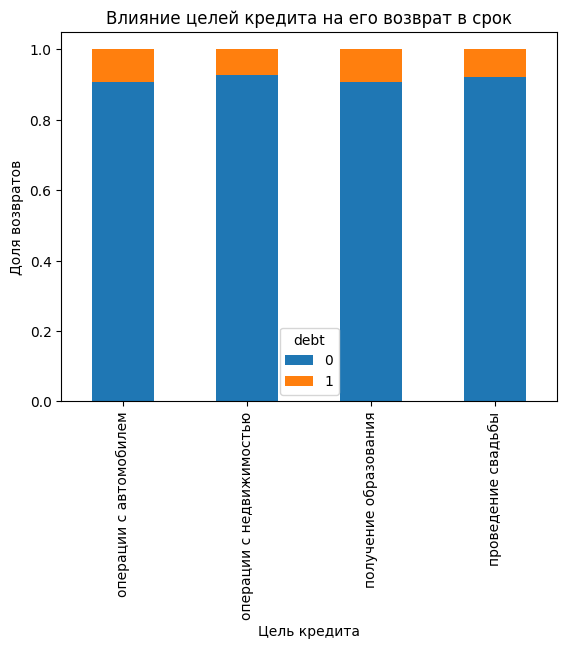

In [36]:
credit_purpose_return = data.groupby('purpose_category')['debt'].value_counts(normalize=True).unstack()
credit_purpose_return.plot(kind='bar', stacked=True)
plt.title('Влияние целей кредита на его возврат в срок')
plt.xlabel('Цель кредита')
plt.ylabel('Доля возвратов')
plt.show()

In [37]:
# Создание сводной таблицы по категории дохода
purpose_category_pivot = create_pivot_table(data, 'purpose_category')
display(purpose_category_pivot)

,Клиентов (%),Должников (%)
Категория,,
операции с автомобилем,20.06,9.35
операции с недвижимостью,50.40,7.26
получение образования,18.70,9.25
проведение свадьбы,10.84,7.91


**Вывод:** Клиенты, берущие кредиты на важные жизненные цели, такие как 'операции с недвижимостью' (50.40% клиентов, 7.26% должников), и 'проведение свадьбы' (10.84% клиентов, 7.91% должников), более ответственно подходят к их погашению, чем те, кто берет кредиты на 'операции с автомобилем' (20.06% клиентов, 9.35% должников) или 'получение образования' (18.17% клиентов, 9.25% должников).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в данных могут возникать по нескольким причинам:

* Ошибки при вводе данных.
* Неполная информация от клиентов (например, не указали количество детей).
* Технические сбои в процессе сбора данных.
* Условия, при которых информация не применима (например, отсутствие дохода у безработных) и др.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнение пропусков медианным значением является хорошей практикой, потому что медиана менее чувствительна к выбросам, чем среднее значение. Это означает, что если в данных есть аномальные значения, они не будут искажать заполнение пропусков.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

В ходе иссдедования проверены следующие гипотезы и сделаны выводы.
1. Есть ли зависимость между количеством детей и возвратом кредита в срок?

Большинство клиентов в выборке — это те, у кого нет детей (66.06%). Доля должников среди клиентов с детьми (9.24%) выше, чем среди клиентов без детей (7.54%). Это может указывать на то, что наличие детей связано с более высокой вероятностью задолженности. 

2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

Анализ данных подтверждает наличие определенной зависимости между семейным положением
и вероятностью своевременного возврата кредита:

Холостые заемщики (9.76%) показывают самую высокую долю должников. 
Пары в гражданском браке (9.31%) также демонстрируют повышенный риск.
Официально женатые/замужние (7.56%) показывают более низкий процент.
Разведенные (7.06%) имеют неплохой показатель.
Вдовцы/вдовы (6.62%) показывают лучший результат.
 
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Прямая зависимость между уровнем дохода и ответственностью по кредитам не является абсолютной.
Наибольшее количество заемщиков приходится на категории B (23.51%) и C (74.64%)- клиентов со средним доходом.
Процент должников варьируется от 8.00% до 9.09% в разных категориях.
Выборка существенно несбалансирована, особенно в категориях A, D и E. В этих категориях требуется дополнительный анализ из-за малой выборки.

4. Как разные цели кредита влияют на его возврат в срок?

Клиенты, берущие кредиты на важные жизненные цели, такие как 'операции с недвижимостью' (50.40% клиентов, 7.26% должников), и 'проведение свадьбы' (10.84% клиентов, 7.91% должников), более ответственно подходят к их погашению, чем те, кто берет кредиты на 'операции с автомобилем' (20.06% клиентов, 9.35% должников) или 'получение образования' (18.17% клиентов, 9.25% должников).